Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [ ]:
import numpy as np
import pandas as pd

In [2]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)

In [3]:
datY

array([13.36138028, 13.031782  , 12.36307639, ..., 12.01370075,
       12.89921983, 12.9456262 ])

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

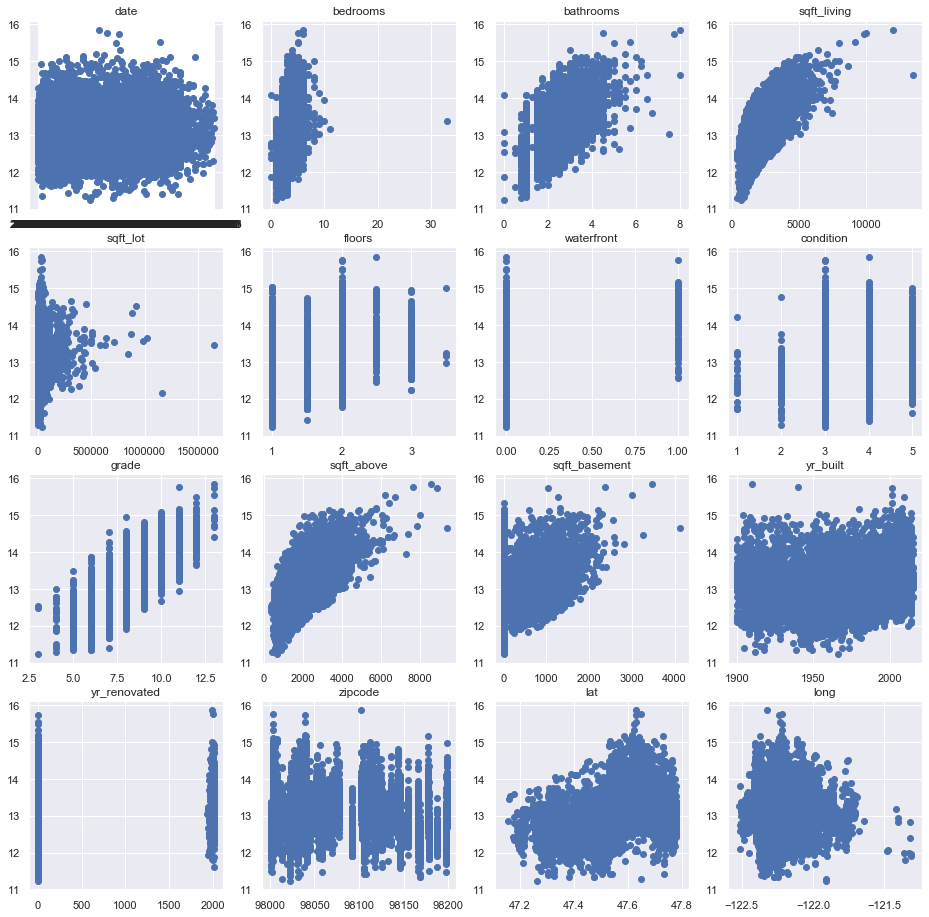

In [5]:
f, ax=plt.subplots(4, 4, figsize=(16,16))
for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

In [6]:
datX.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features



In [7]:
datX = datX.drop(['date', 'sqft_lot' , 'waterfront' , 'yr_built' , 'yr_renovated' , 'zipcode'], axis = 1)

In [8]:
datX
datX.shape

(15000, 10)

Run the following cell to automatically check results of your code:

In [13]:
X = datX.to_numpy()
N = 15000
m = 10
from checker import Reader
Reader(X,N,m)

All passed
Total check:  3 /3


Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$



In [14]:
X.shape

(15000, 10)

In [15]:

def loss(w_k, X, y):
    lossValue = 0
    y_calc = np.empty(15000)
    for j in range(15000):
         y_calc[j] = w_k[0] + w_k[1]*X[j][0] + w_k[2]*X[j][1] + w_k[3]*X[j][2] + w_k[4]*X[j][3] + w_k[5]*X[j][4] + w_k[6]*X[j][5] + w_k[7]*X[j][6] + w_k[8]*X[j][7] + w_k[9]*X[j][8] + w_k[10]*X[j][9]
    for i in range(15000):
        lossValue = lossValue + (y_calc[i] - y[i])**2
    lossValue = lossValue/y.size
    return lossValue

Run the following cell to automatically check results of your code:

In [16]:
from checker import lossOK
lossOK(loss, X, datY)

Random test  0 :  OK, time_User= 0.33139967918395996 s;  timeBaseline= 0.050864458084106445 s
Random test  1 :  OK, time_User= 0.36704397201538086 s;  timeBaseline= 0.003988742828369141 s
Random test  2 :  OK, time_User= 0.6991887092590332 s;  timeBaseline= 0.003989458084106445 s
Random test  3 :  OK, time_User= 0.3779876232147217 s;  timeBaseline= 0.0029926300048828125 s
Random test  4 :  OK, time_User= 0.35905909538269043 s;  timeBaseline= 0.0029926300048828125 s
Random test  5 :  OK, time_User= 0.35157132148742676 s;  timeBaseline= 0.0029914379119873047 s
Random test  6 :  OK, time_User= 0.35504817962646484 s;  timeBaseline= 0.001995086669921875 s
Random test  7 :  OK, time_User= 0.33462095260620117 s;  timeBaseline= 0.002993345260620117 s
Random test  8 :  OK, time_User= 0.34758520126342773 s;  timeBaseline= 0.0029926300048828125 s
Random test  9 :  OK, time_User= 0.3431065082550049 s;  timeBaseline= 0.0029916763305664062 s
All passed
Total check:  10 /10



$$ Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2 $$ 
taking partial derivative with respect to w_k
$$ \frac{\partial Loss}{\partial w_k} = \frac{1}{N}\sum_{i=1}^N 2 \, (y_i-\hat{y}_i) \left(\! -\frac{\partial \hat{y}_i}{\partial w_k} \!\right) $$
and with the other given equation above 
$$ \hat{y}_i = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_m x_m = \sum_{j=1}^N X_{ij} w_j $$ 
where
$$ (X_{ij}) = (\vec{1}, \vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N) $$
is the extended $X$ matrix, we find
$$ \frac{\partial Loss}{\partial w_k} = \frac{-2}{N} \sum_{i=1}^N (y_i - \hat{y}_i) X_{ik} \;.$$

In [17]:

def grad(w_k, X, y):
    y_calc = np.empty(15000)
    for j in range(15000):
        y_calc[j] = w_k[0] + w_k[1]*X[j][0] + w_k[2]*X[j][1] + w_k[3]*X[j][2] + w_k[4]*X[j][3] + w_k[5]*X[j][4] + w_k[6]*X[j][5] + w_k[7]*X[j][6] + w_k[8]*X[j][7] + w_k[9]*X[j][8] + w_k[10]*X[j][9]
    sum = 0
    for i in range(15000):
        sum = sum + y[i] - y_calc[i]
    lvu = np.zeros(11)
    lvu[0] = sum
    for i in range(1,11):
        sum = 0
        for j in range(15000):
            constant = X[j][i-1]
            temp_sum = y[j] - w_k[0] - w_k[1]*X[j][0] - w_k[2]*X[j][1] - w_k[3]*X[j][2] - w_k[4]*X[j][3] - w_k[5]*X[j][4] - w_k[6]*X[j][5] - w_k[7]*X[j][6] - w_k[8]*X[j][7] - w_k[9]*X[j][8] - w_k[10]*X[j][9]
            temp_sum = temp_sum*constant
            sum = sum + temp_sum
        lvu[i] = sum
    lvu = (-2/15000)*lvu
    return lvu

Run the following cell to automatically check your function. You will also see time comparison: if your function works sufficiently slower, you probably should think of faster alternative.

In [18]:
from checker import gradOK
gradOK(grad, X, datY)

Random test  0 :  OK, time_User= 3.945237159729004 s;  timeBaseline= 0.03988933563232422 s
Random test  1 :  OK, time_User= 3.941283702850342 s;  timeBaseline= 0.002992868423461914 s
Random test  2 :  OK, time_User= 3.8715221881866455 s;  timeBaseline= 0.0029935836791992188 s
Random test  3 :  OK, time_User= 4.775700330734253 s;  timeBaseline= 0.002994537353515625 s
Random test  4 :  OK, time_User= 3.5667002201080322 s;  timeBaseline= 0.000997304916381836 s
Random test  5 :  OK, time_User= 4.081505537033081 s;  timeBaseline= 0.002996683120727539 s
Random test  6 :  OK, time_User= 5.162919998168945 s;  timeBaseline= 0.0019948482513427734 s
Random test  7 :  OK, time_User= 3.9640262126922607 s;  timeBaseline= 0.0019965171813964844 s
Random test  8 :  OK, time_User= 5.121780157089233 s;  timeBaseline= 0.0019838809967041016 s
Random test  9 :  OK, time_User= 3.612471103668213 s;  timeBaseline= 0.0019974708557128906 s
All passed
Total check:  10 /10



How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is too high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [19]:
#Task5
#Gradient descent and prediction


import math
def calculate_gradient_length(nabla):
    length = 0
    for i in range(11):
        length = length + (nabla[i])**2
    length = math.sqrt(length)
    return length


def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
        losses = []
        weights = [w_init]
        curiter = 0
        w_k = weights[-1]
        print ()
        #your code goes here\n",
        lossValue_k = 10000000000
        grad_length = 10000000000
        w_k_old = w_init
        #vec{w}^{k+1}=\\vec{w}^{k}-\\alpha_k\\cdot \\nabla Loss(\\vec{w}^{k})
        while curiter < maxiter and lossValue_k > eps :
            print("Iteration no. : ",curiter)
            curr_grad = grad(w_k_old,X,y)
            w_k = w_k_old - alpha*curr_grad
#             print(":",curr_grad)
#             print("Old weights:",w_k_old)
#             print("New weights:",w_k)
            grad_length = calculate_gradient_length(curr_grad)
            print("Gradient length:",grad_length)
            lossValue_k = loss(w_k,X,y)
            print("Loss:",lossValue_k)
            print("\n\n")
            weights.append(w_k)
            losses.append(lossValue_k)
            curiter = curiter + 1
            w_k_old = w_k
            print()
        return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):


In [64]:
# w_init = [5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000]
w_init = np.ones(11)
weights,losses = gradDescent(w_init,0.0000001,X,datY)


Gradient: [ 8.21066810e+03  2.97047809e+04  1.96142486e+04  2.05721892e+07
  1.30079381e+04  2.78528771e+04  6.62440799e+04  1.74581321e+07
  3.11405708e+06  3.90531292e+05 -1.00332388e+06]
Old weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
New weights: [ 0.99917893  0.99702952  0.99803858 -1.05721892  0.99869921  0.99721471
  0.99337559 -0.74581321  0.68859429  0.96094687  1.10033239]
Loss: 14008624.051782243

Gradient: [-6.85312294e+03 -2.45593331e+04 -1.62290378e+04 -1.68817882e+07
 -1.10697065e+04 -2.30858531e+04 -5.52486424e+04 -1.48019705e+07
 -2.07981774e+06 -3.25942478e+05  8.37400809e+05]
Old weights: [ 0.99917893  0.99702952  0.99803858 -1.05721892  0.99869921  0.99721471
  0.99337559 -0.74581321  0.68859429  0.96094687  1.10033239]
New weights: [0.99986425 0.99948546 0.99966148 0.6309599  0.99980618 0.9995233
 0.99890046 0.73438383 0.89657607 0.99354112 1.01659231]
Loss: 9674576.431098636

Gradient: [ 5.65173007e+03  2.04775589e+04  1.35217759e+04  1.42001884e+07
  8.93135969e

Loss: 52623.75161077805

Gradient: [-3.71248817e+02 -1.26469045e+03 -8.27750996e+02 -8.22781649e+05
 -6.28292518e+02 -1.22343440e+03 -2.94526315e+03 -8.10202528e+05
 -1.25791217e+04 -1.76534190e+04  4.53593160e+04]
Old weights: [ 0.99956861  0.9982786   0.99886147 -0.28883632  0.99943438  0.99844201
  0.99645798  0.18997937  0.52118431  0.97947013  1.05273361]
New weights: [ 0.99960574  0.99840507  0.99894424 -0.20655816  0.99949721  0.99856435
  0.9967525   0.27099962  0.52244222  0.98123547  1.04819768]
Loss: 39731.70671211621

Gradient: [ 2.65020020e+02  1.02515728e+03  6.85335088e+02  7.56937106e+05
  3.91896123e+02  9.25911319e+02  2.18738102e+03  5.56754124e+05
  2.00182982e+05  1.26089729e+04 -3.23892363e+04]
Old weights: [ 0.99960574  0.99840507  0.99894424 -0.20655816  0.99949721  0.99856435
  0.9967525   0.27099962  0.52244222  0.98123547  1.04819768]
New weights: [ 0.99957923  0.99830256  0.99887571 -0.28225187  0.99945802  0.99847176
  0.99653376  0.21532421  0.50242392  0.

Gradient: [-4.23663501e+01 -1.01228937e+02 -5.38172248e+01 -2.73666683e+04
 -7.16596004e+01 -1.32864405e+02 -2.83256282e+02 -6.38263063e+04
  3.64596381e+04 -2.01321277e+03  5.17645054e+03]
Old weights: [ 0.99962531  0.99838518  0.99891491 -0.28885308  0.99955375  0.99860148
  0.99682861  0.29879733  0.4123496   0.98216239  1.04580939]
New weights: [ 0.99962955  0.9983953   0.99892029 -0.28611641  0.99956092  0.99861477
  0.99685693  0.30517996  0.40870363  0.98236371  1.04529175]
Loss: 3275.9319191875534

Gradient: [-1.00175774e+01  1.44991282e+01  2.28238553e+01  5.22176520e+04
 -1.88028020e+01 -2.42791543e+01 -2.20164212e+01  7.00726631e+03
  4.52103857e+04 -4.74705935e+02  1.22376914e+03]
Old weights: [ 0.99962955  0.9983953   0.99892029 -0.28611641  0.99956092  0.99861477
  0.99685693  0.30517996  0.40870363  0.98236371  1.04529175]
New weights: [ 0.99963055  0.99839385  0.99891801 -0.29133817  0.9995628   0.9986172
  0.99685913  0.30447923  0.40418259  0.98241118  1.04516937]
Los

Loss: 1347.185170760676

Gradient: [-2.42474904e+01 -4.48978846e+01 -1.44763381e+01  8.16267868e+03
 -3.00846644e+01 -8.04184592e+01 -1.33592879e+02 -8.07745337e+03
  1.62401321e+04 -1.15238362e+03  2.96445979e+03]
Old weights: [ 0.9996686   0.99846207  0.9989415  -0.30494777  0.9996178   0.99873844
  0.99707497  0.32981488  0.36523735  0.98421887  1.04051921]
New weights: [ 0.99967102  0.99846656  0.99894294 -0.30576404  0.99962081  0.99874648
  0.99708833  0.33062262  0.36361334  0.9843341   1.04022277]
Loss: 1308.2551355766198

Gradient: [   -25.62057386    -50.15282067    -17.87970989   4414.03811874
    -31.85951278    -85.35687632   -144.56357787 -10461.81556056
  14875.85367931  -1217.72314011   3132.31231202]
Old weights: [ 0.99967102  0.99846656  0.99894294 -0.30576404  0.99962081  0.99874648
  0.99708833  0.33062262  0.36361334  0.9843341   1.04022277]
New weights: [ 0.99967358  0.99847157  0.99894473 -0.30620544  0.999624    0.99875502
  0.99710279  0.33166881  0.36212575  0

Loss: 1030.2932860794706

Gradient: [  -25.0001446    -51.17262581   -17.91775161  2351.12690463
   -26.64826066   -86.24825192  -138.71026099 -3650.59908766
  6001.72599229 -1188.54070358  3057.18299293]
Old weights: [ 0.99971105  0.99854614  0.99897054 -0.31214375  0.99966656  0.99888241
  0.99731107  0.34047102  0.34738523  0.98623702  1.03532793]
New weights: [ 0.99971355  0.99855125  0.99897233 -0.31237886  0.99966922  0.99889104
  0.99732494  0.34083608  0.34678506  0.98635588  1.03502221]
Loss: 1023.881387939966

Gradient: [  -24.93552156   -51.06824428   -17.82898988  2364.37607221
   -26.39245048   -86.13931499  -138.17184313 -3321.60312486
  5685.97919707 -1185.4792168   3049.31104291]
Old weights: [ 0.99971355  0.99855125  0.99897233 -0.31237886  0.99966922  0.99889104
  0.99732494  0.34083608  0.34678506  0.98635588  1.03502221]
New weights: [ 0.99971605  0.99855636  0.99897411 -0.3126153   0.99967186  0.99889965
  0.99733876  0.34116824  0.34621646  0.98647443  1.03471728]

Loss: 969.9416793053167

Gradient: [  -24.81057759   -52.0362393    -18.3197727    977.81318363
   -24.69464971   -86.81560173  -137.1914112  -1292.07948708
  2269.89267071 -1179.66095425  3034.28522042]
Old weights: [ 0.99975339  0.99863393  0.99900135 -0.31490757  0.99971003  0.99902961
  0.99754546  0.34442387  0.34066856  0.98824974  1.03015084]
New weights: [ 0.99975587  0.99863914  0.99900318 -0.31500535  0.9997125   0.99903829
  0.99755918  0.34455308  0.34044157  0.98836771  1.02984741]
Loss: 968.1228768349661

Gradient: [  -24.80187169   -52.06528638   -18.33711942   922.73867515
   -24.62882993   -86.82584103  -137.13626552 -1220.3153301
  2143.05400525 -1179.25154808  3033.2297246 ]
Old weights: [ 0.99975587  0.99863914  0.99900318 -0.31500535  0.9997125   0.99903829
  0.99755918  0.34455308  0.34044157  0.98836771  1.02984741]
New weights: [ 0.99975835  0.99864434  0.99900502 -0.31509762  0.99971496  0.99904697
  0.9975729   0.34467511  0.34022727  0.98848563  1.02954409]
L

Loss: 946.0158849014125

Gradient: [  -24.60783638   -52.09312727   -18.38883821   427.49683401
   -23.84132016   -86.55906186  -135.92441317  -436.59639755
   864.09323156 -1170.07112286  3009.59531537]
Old weights: [ 0.99979541  0.99872252  0.99903259 -0.31605259  0.99975124  0.99917707
  0.99777769  0.34582135  0.33812606  0.99024773  1.0250117 ]
New weights: [ 0.99979787  0.99872773  0.99903443 -0.31609534  0.99975363  0.99918572
  0.99779128  0.34586501  0.33803965  0.99036474  1.02471074]
Loss: 944.8615269986343

Gradient: [  -24.59504251   -52.08181393   -18.38621825   409.32245196
   -23.80667433   -86.52925558  -135.84821176  -407.49839918
   816.82085114 -1169.4644718   3008.03415959]
Old weights: [ 0.99979787  0.99872773  0.99903443 -0.31609534  0.99975363  0.99918572
  0.99779128  0.34586501  0.33803965  0.99036474  1.02471074]
New weights: [ 0.99980033  0.99873294  0.99903626 -0.31613627  0.99975601  0.99919438
  0.99780486  0.34590576  0.33795797  0.99048168  1.02440994]


Loss: 927.5125169785682

Gradient: [  -24.38718899   -51.79853655   -18.29989646   221.76599766
   -23.37947079   -85.94963782  -134.64400075  -114.66480099
   336.43079865 -1159.59826974  2982.64907034]
Old weights: [ 0.99983707  0.99881087  0.99906379 -0.31658696  0.99979137  0.99932376
  0.99800773  0.34626201  0.33715103  0.99222853  1.0199168 ]
New weights: [ 0.9998395   0.99881605  0.99906562 -0.31660914  0.99979371  0.99933235
  0.9980212   0.34627347  0.33711739  0.99234449  1.01961853]
Loss: 926.4686271086886

Gradient: [  -24.37400349   -51.77607486   -18.29237305   214.80203466
   -23.35830562   -85.90867645  -134.56891294  -103.8608516
   318.66288626 -1158.97193529  2981.03776583]
Old weights: [ 0.9998395   0.99881605  0.99906562 -0.31660914  0.99979371  0.99933235
  0.9980212   0.34627347  0.33711739  0.99234449  1.01961853]
New weights: [ 0.99984194  0.99882123  0.99906745 -0.31663062  0.99979605  0.99934094
  0.99803465  0.34628386  0.33708552  0.99246039  1.01932043]
L

Loss: 910.0568698502499

Gradient: [  -24.16177992   -51.3771329    -18.15414616   143.89578406
   -23.06687715   -85.2145968   -133.37096616     5.67516997
   138.2206141  -1148.8871501   2955.09548225]
Old weights: [ 0.99987834  0.9988986   0.99909479 -0.31689118  0.99983085  0.99946929
  0.99823561  0.34634419  0.33676463  0.99419129  1.0148683 ]
New weights: [ 0.99988076  0.99890374  0.9990966  -0.31690557  0.99983316  0.99947782
  0.99824894  0.34634362  0.33675081  0.99430618  1.01457279]
Loss: 909.0450603596631

Gradient: [  -24.1484818    -51.3504972    -18.14473764   141.25225387
   -23.05077838   -85.16957751  -133.29637504     9.70785351
   131.54440036 -1148.25506187  2953.46956463]
Old weights: [ 0.99988076  0.99890374  0.9990966  -0.31690557  0.99983316  0.99947782
  0.99824894  0.34634362  0.33675081  0.99430618  1.01457279]
New weights: [ 0.99988318  0.99890887  0.99909842 -0.3169197   0.99983547  0.99948633
  0.99826227  0.34634265  0.33673765  0.99442101  1.01427744]


Loss: 893.0270998826039

Gradient: [  -23.93590004   -50.9109572    -17.9880669    114.09441161
   -22.81158518   -84.43707809  -132.1079556     50.39526875
    63.69914286 -1138.14919591  2927.47494339]
Old weights: [ 0.99991924  0.99898557  0.99912552 -0.31710803  0.99986986  0.99961354
  0.99846133  0.34629257  0.33659939  0.99613581  1.00986674]
New weights: [ 0.99992163  0.99899066  0.99912732 -0.31711944  0.99987214  0.99962198
  0.99847454  0.34628753  0.33659302  0.99624962  1.009574  ]
Loss: 892.0360141326819

Gradient: [  -23.92264011   -50.88293268   -17.97801714   113.06840569
   -22.79746813   -84.39082081  -132.0340029     51.88215903
    61.18624667 -1137.51877376  2925.85338083]
Old weights: [ 0.99992163  0.99899066  0.99912732 -0.31711944  0.99987214  0.99962198
  0.99847454  0.34628753  0.33659302  0.99624962  1.009574  ]
New weights: [ 0.99992402  0.99899575  0.99912911 -0.31713075  0.99987442  0.99963042
  0.99848774  0.34628235  0.33658691  0.99636337  1.00928141]


Loss: 876.3303568356322

Gradient: [  -23.71117422   -50.43087672   -17.81540685   102.34113236
   -22.57910489   -83.64833808  -130.8561072     66.72910076
    35.6120316  -1127.46444719  2899.99203264]
Old weights: [ 0.99995975  0.99907174  0.99915596 -0.31729111  0.99990845  0.99975645
  0.99868491  0.34619151  0.33651737  0.9980621   1.00491205]
New weights: [ 0.99996212  0.99907678  0.99915774 -0.31730135  0.99991071  0.99976482
  0.99869799  0.34618484  0.33651381  0.99817485  1.00462205]
Loss: 875.3580907209925

Gradient: [  -23.69800637   -50.40250021   -17.80517754   101.92287103
   -22.56580766   -83.60189213  -130.78282608    67.26070545
    34.66216557 -1126.83834741  2898.38161385]
Old weights: [ 0.99996212  0.99907678  0.99915774 -0.31730135  0.99991071  0.99976482
  0.99869799  0.34618484  0.33651381  0.99817485  1.00462205]
New weights: [ 0.99996449  0.99908182  0.99915952 -0.31731154  0.99991297  0.99977318
  0.99871107  0.34617811  0.33651035  0.99828753  1.00433221]


Loss: 859.9484396273634

Gradient: [  -23.48819879   -49.94844787   -17.64131463    97.36868008
   -22.35647446   -82.8600624   -129.61576959    72.41088893
    24.95779115 -1116.86230285  2872.72188194]
Old weights: [ 0.99999988  0.99915708  0.99918611 -0.31746056  0.99994666  0.99989802
  0.99890637  0.34607266  0.33646678  0.9999703   1.00000391]
New weights: [ 1.00000223  0.99916208  0.99918787 -0.3174703   0.99994889  0.99990631
  0.99891933  0.34606541  0.33646429  1.00008198  0.99971664]
Loss: 858.9944268848154

Gradient: [  -23.47514261   -49.92010733   -17.63107869    97.17887379
   -22.34356028   -82.81381938  -129.54316909    72.58411529
    24.5947585  -1116.24149174  2871.12507607]
Old weights: [ 1.00000223  0.99916208  0.99918787 -0.3174703   0.99994889  0.99990631
  0.99891933  0.34606541  0.33646429  1.00008198  0.99971664]
New weights: [ 1.00000458  0.99916707  0.99918963 -0.31748001  0.99995113  0.99991459
  0.99893228  0.34605816  0.33646183  1.00019361  0.99942953]


Loss: 843.8737633992267

Gradient: [  -23.26718526   -49.4679822    -17.4677134     94.94706976
   -22.1388159    -82.07659405  -128.3870051     74.09805201
    20.84901775 -1106.35321212  2845.69118576]
Old weights: [ 1.00003963  0.99924161  0.99921596 -0.31762394  0.99998449  1.00003826
  0.99912573  0.34594788  0.33642818  1.00186054  0.99514194]
New weights: [ 1.00004196  0.99924656  0.9992177  -0.31763343  0.9999867   1.00004647
  0.99913857  0.34594047  0.33642609  1.00197118  0.99485738]
Loss: 842.9376318911279

Gradient: [  -23.25424737   -49.43982165   -17.45753519    94.84333621
   -22.1261201    -82.03069838  -128.31508455    74.13698871
    20.7063475  -1105.73801777  2844.10883055]
Old weights: [ 1.00004196  0.99924656  0.9992177  -0.31763343  0.9999867   1.00004647
  0.99913857  0.34594047  0.33642609  1.00197118  0.99485738]
New weights: [ 1.00004428  0.9992515   0.99921945 -0.31764292  0.99998891  1.00005467
  0.9991514   0.34593306  0.33642402  1.00208175  0.99457296]


Loss: 828.1003335061147

Gradient: [  -23.04820076   -48.99107148   -17.29531547    93.48828851
   -21.92428596   -81.29951982  -127.16976886    74.28979958
    19.19848893 -1095.94051361  2818.90846292]
Old weights: [ 1.00007901  0.99932532  0.99924551 -0.3177841   1.00002195  1.00017717
  0.99934301  0.34582164  0.33639426  1.003733    0.99032573]
New weights: [ 1.00008132  0.99933022  0.99924724 -0.31779345  1.00002414  1.0001853
  0.99935573  0.34581421  0.33639234  1.00384259  0.99004384]
Loss: 827.1817439308517

Gradient: [  -23.03538292   -48.96314344   -17.28521856    93.41717304
   -21.91174601   -81.25402316  -127.09852403    74.27856855
    19.13860449 -1095.33102501  2817.34078497]
Old weights: [ 1.00008132  0.99933022  0.99924724 -0.31779345  1.00002414  1.0001853
  0.99935573  0.34581421  0.33639234  1.00384259  0.99004384]
New weights: [ 1.00008362  0.99933512  0.99924897 -0.31780279  1.00002634  1.00019342
  0.99936844  0.34580678  0.33639042  1.00395213  0.98976211]
Lo

Loss: 812.6224717109417

Gradient: [  -22.83125831   -48.51828675   -17.12437861    92.39613494
   -21.71218081   -80.52939219  -125.9639764     73.92431406
    18.47182089 -1085.62488212  2792.37542343]
Old weights: [ 1.00011802  0.99940823  0.99927478 -0.31794213  1.00005905  1.00031476
  0.99955824  0.34569559  0.33636228  1.00558783  0.98555485]
New weights: [ 1.0001203   0.99941308  0.99927649 -0.31795137  1.00006122  1.00032281
  0.99957083  0.3456882   0.33636043  1.0056964   0.98527561]
Loss: 811.7210947695879

Gradient: [  -22.81856049   -48.49060938   -17.11437131    92.3375674
   -21.69977255   -80.4843114   -125.89340174    73.89449299
    18.44307441 -1085.02109881  2790.8224207 ]
Old weights: [ 1.0001203   0.99941308  0.99927649 -0.31795137  1.00006122  1.00032281
  0.99957083  0.3456882   0.33636043  1.0056964   0.98527561]
New weights: [ 1.00012258  0.99941793  0.9992782  -0.3179606   1.00006339  1.00033086
  0.99958342  0.34568081  0.33635859  1.0058049   0.98499653]
L

Loss: 797.4346349366432

Gradient: [  -22.61635077   -48.04981612   -16.95499013    91.44674188
   -21.50222445   -79.76637577  -124.76952903    73.35375706
    18.09298482 -1075.40599788  2766.09123518]
Old weights: [ 1.00015666  0.99949034  0.99930376 -0.31809843  1.0000958   1.00045105
  0.99977142  0.34557036  0.33633121  1.00742521  0.98082887]
New weights: [ 1.00015892  0.99949514  0.99930545 -0.31810758  1.00009795  1.00045902
  0.99978389  0.34556303  0.3363294   1.00753275  0.98055226]
Loss: 796.5501480144056

Gradient: [  -22.60377222   -48.02239469   -16.94507499    91.39318492
   -21.48993811   -79.72171469  -124.69961853    73.31719819
    18.07598673 -1074.80788616  2764.55282063]
Old weights: [ 1.00015892  0.99949514  0.99930545 -0.31810758  1.00009795  1.00045902
  0.99978389  0.34556303  0.3363294   1.00753275  0.98055226]
New weights: [ 1.00016118  0.99949994  0.99930715 -0.31811672  1.00010009  1.000467
  0.99979636  0.3455557   0.33632759  1.00764023  0.98027581]
Lo

Loss: 782.5313880258176

Gradient: [  -22.40346349   -47.58570417   -16.78717337    90.55601962
   -21.2943016    -79.01048996  -123.58632335    72.71029396
    17.84572567 -1065.28317317  2740.05412561]
Old weights: [ 1.00019494  0.99957165  0.99933244 -0.31825317  1.00013218  1.00058604
  0.99998258  0.34544617  0.33630066  1.00924528  0.97614738]
New weights: [ 1.00019718  0.99957641  0.99933412 -0.31826223  1.00013431  1.00059394
  0.99999494  0.3454389   0.33629887  1.00935181  0.97587338]
Loss: 781.6634746254136

Gradient: [  -22.39100326   -47.55853914   -16.77735079    90.50464086
   -21.28213284   -78.96624755  -123.51707087    72.67144442
    17.83319645 -1064.69068715  2738.53018111]
Old weights: [ 1.00019718  0.99957641  0.99933412 -0.31826223  1.00013431  1.00059394
  0.99999494  0.3454389   0.33629887  1.00935181  0.97587338]
New weights: [ 1.00019942  0.99958116  0.9993358  -0.31827128  1.00013644  1.00060184
  1.00000729  0.34543163  0.33629709  1.00945828  0.97559952]


Loss: 767.9073982362744

Gradient: [  -22.19257916   -47.12594184   -16.62092778    89.69235249
   -21.08835745   -78.26170007  -122.4142548     72.04350222
    17.64885027 -1055.25558744  2714.26198286]
Old weights: [ 1.00023285  0.99965218  0.99936085 -0.31840642  1.00016822  1.00071976
  1.00019173  0.34532309  0.33627048  1.01104823  0.97150996]
New weights: [ 1.00023507  0.99965689  0.99936251 -0.31841539  1.00017033  1.00072759
  1.00020398  0.34531589  0.33626872  1.01115376  0.97123853]
Loss: 767.0557478011764

Gradient: [  -22.18023619   -47.09903189   -16.61119738    89.64208583
   -21.07630396   -78.21787347  -122.34565419    72.00402926
    17.63805657 -1054.66867698  2712.75237939]
Old weights: [ 1.00023507  0.99965689  0.99936251 -0.31841539  1.00017033  1.00072759
  1.00020398  0.34531589  0.33626872  1.01115376  0.97123853]
New weights: [ 1.00023729  0.9996616   0.99936417 -0.31842436  1.00017243  1.00073541
  1.00021621  0.34530869  0.33626695  1.01125922  0.97096726]


Loss: 753.5574328313759

Gradient: [  -21.98367958   -46.67050022   -16.45624391    88.84382437
   -20.88435997   -77.51995147  -121.25321902    71.37195557
    17.47186879 -1045.32237562  2688.7125813 ]
Old weights: [ 1.00027041  0.99973192  0.99938897 -0.31855822  1.0002039   1.00085221
  1.00039891  0.34520116  0.33624062  1.01283421  0.96691619]
New weights: [ 1.00027261  0.99973659  0.99939062 -0.31856711  1.00020599  1.00085996
  1.00041103  0.34519402  0.33623887  1.01293874  0.96664731]
Loss: 752.7217406256962

Gradient: [  -21.97145278   -46.64384333   -16.44660499    88.7942668
   -20.87242022   -77.47653717  -121.18526416    71.33248286
    17.46178394 -1044.74098929  2687.21718658]
Old weights: [ 1.00027261  0.99973659  0.99939062 -0.31856711  1.00020599  1.00085996
  1.00041103  0.34519402  0.33623887  1.01293874  0.96664731]
New weights: [ 1.00027481  0.99974126  0.99939226 -0.31857598  1.00020808  1.00086771
  1.00042315  0.34518689  0.33623713  1.01304321  0.96637859]
L

Loss: 739.4763571368931

Gradient: [  -21.77674628   -46.21934312   -16.29310906    88.00591494
   -20.68228581   -76.78518243  -120.10311234    70.70258904
    17.3033259  -1035.48266112  2663.4036661 ]
Old weights: [ 1.00030762  0.9998109   0.99941682 -0.31870858  1.00023925  1.00098341
  1.00060412  0.34508036  0.33621105  1.01460337  0.96236566]
New weights: [ 1.0003098   0.99981552  0.99941845 -0.31871738  1.00024131  1.00099109
  1.00061613  0.34507329  0.33620932  1.01470692  0.96209931]
Loss: 738.6563241350889

Gradient: [  -21.76463457   -46.19293707   -16.28356084    87.95691245
   -20.67045856   -76.74217671  -120.03579716    70.6633485
    17.29356395 -1034.90674733  2661.92234737]
Old weights: [ 1.0003098   0.99981552  0.99941845 -0.31871738  1.00024131  1.00099109
  1.00061613  0.34507329  0.33620932  1.01470692  0.96209931]
New weights: [ 1.00031197  0.99982014  0.99942008 -0.31872618  1.00024338  1.00099876
  1.00062813  0.34506622  0.33620759  1.01481041  0.96183312]
L

Loss: 725.6591326937713

Gradient: [  -21.57176086   -45.7724319    -16.13150942    87.17688081
   -20.48211499   -76.05732898  -118.96383195    70.03796877
    17.13891204 -1025.73556826  2638.33298479]
Old weights: [ 1.00034448  0.99988912  0.99944439 -0.31885753  1.00027425  1.00111336
  1.00080738  0.3449607   0.33618177  1.01635588  0.95785796]
New weights: [ 1.00034663  0.9998937   0.999446   -0.31886625  1.00027629  1.00112096
  1.00081928  0.3449537   0.33618006  1.01645845  0.95759413]
Loss: 724.8544654734931

Gradient: [  -21.55976316   -45.7462744    -16.12205106    87.12837284
   -20.4703991    -76.01472805  -118.89715043    69.99904528
    17.12932756 -1025.16507563  2636.86560995]
Old weights: [ 1.00034663  0.9998937   0.999446   -0.31886625  1.00027629  1.00112096
  1.00081928  0.3449537   0.33618006  1.01645845  0.95759413]
New weights: [ 1.00034879  0.99989827  0.99944761 -0.31887496  1.00027834  1.00112857
  1.00083117  0.3449467   0.33617834  1.01656097  0.95733044]


Loss: 712.1008154539261

Gradient: [  -21.36870501   -45.32972725   -15.9714308     86.35602146
   -20.28382886   -75.33632665  -117.83527596    69.37902113
    16.97700033 -1016.08022681  2613.49829905]
Old weights: [ 1.00038099  0.99996658  0.99947168 -0.31900507  1.00030891  1.00124208
  1.00100871  0.34484216  0.33615276  1.01809189  0.95339269]
New weights: [ 1.00038312  0.99997111  0.99947328 -0.31901371  1.00031093  1.00124961
  1.0010205   0.34483523  0.33615107  1.0181935   0.95313134]
Loss: 711.3112260909498

Gradient: [  -21.35682025   -45.30381596   -15.96206148    86.30798259
   -20.27222328   -75.29412673  -117.76922213    69.34044439
    16.9675382  -1015.51510438  2612.04473699]
Old weights: [ 1.00038312  0.99997111  0.99947328 -0.31901371  1.00031093  1.00124961
  1.0010205   0.34483523  0.33615107  1.0181935   0.95313134]
New weights: [ 1.00038526  0.99997564  0.99947488 -0.31902234  1.00031296  1.00125714
  1.00103227  0.34482829  0.33614937  1.01829505  0.95287014]


Loss: 698.7965540109128

Gradient: [  -21.16756058   -44.89118979   -15.812859      85.54302832
   -20.08740944   -74.6221112   -116.71734343    68.72605727
    16.81697105 -1006.51577373  2588.89738899]
Old weights: [ 1.00041715  1.00004329  0.99949871 -0.31915123  1.00034323  1.00136958
  1.00120814  0.34472474  0.33612403  1.01981156  0.94896946]
New weights: [ 1.00041927  1.00004777  0.99950029 -0.31915978  1.00034524  1.00137704
  1.00121981  0.34471787  0.33612235  1.01991222  0.94871057]
Loss: 698.0217599761654

Gradient: [  -21.15578769   -44.86552241   -15.80357787    85.49544635
   -20.07591311   -74.58030852  -116.65191138    68.68783629
    16.80761006 -1005.95597096  2587.45750973]
Old weights: [ 1.00041927  1.00004777  0.99950029 -0.31915978  1.00034524  1.00137704
  1.00121981  0.34471787  0.33612235  1.01991222  0.94871057]
New weights: [ 1.00042138  1.00005226  0.99950187 -0.31916833  1.00034725  1.0013845
  1.00123147  0.344711    0.33612067  1.02001281  0.94845182]
L

Loss: 685.7415878640008

Gradient: [ -20.96830958  -44.45678039  -15.65577988   84.73774041  -19.89283903
  -73.91461884 -115.60993436   68.0791577    16.6585827  -997.04135369
 2564.5280546 ]
Old weights: [ 1.00045298  1.00011925  0.99952546 -0.319296    1.00037722  1.00149587
  1.00140567  0.34460843  0.33609557  1.02151505  0.94458786]
New weights: [ 1.00045507  1.0001237   0.99952703 -0.31930448  1.00037921  1.00150326
  1.00141723  0.34460162  0.3360939   1.02161475  0.94433141]
Loss: 684.9813119224458

Gradient: [ -20.95664751  -44.43135463  -15.64658612   84.69060809  -19.88145092
  -73.87320966 -115.54511825   68.04129374   16.64931435 -996.48682051
 2563.10172936]
Old weights: [ 1.00045507  1.0001237   0.99952703 -0.31930448  1.00037921  1.00150326
  1.00141723  0.34460162  0.3360939   1.02161475  0.94433141]
New weights: [ 1.00045717  1.00012814  0.99952859 -0.31931295  1.0003812   1.00151065
  1.00142879  0.34459481  0.33609224  1.0217144   0.9440751 ]
Loss: 684.221881464265

Loss: 672.9312457148203

Gradient: [ -20.77093419  -44.02646023  -15.5001794    83.94005253  -19.70010021
  -73.21378631 -114.51294969   67.43831673   16.50173581 -987.65611926
 2540.38811621]
Old weights: [ 1.00048847  1.00019448  0.99955195 -0.31943942  1.00041089  1.00162096
  1.00160133  0.3444932   0.33606738  1.0232025   0.94024751]
New weights: [ 1.00049054  1.00019889  0.9995535  -0.31944781  1.00041286  1.00162828
  1.00161278  0.34448646  0.33606573  1.02330126  0.93999347]
Loss: 672.1852158262313

Gradient: [ -20.7593819   -44.0012738   -15.49107218   83.89336455  -19.6888193
  -73.17276692 -114.44874371   67.40080815   16.4925564  -987.10680607
 2538.97521741]
Old weights: [ 1.00049054  1.00019889  0.9995535  -0.31944781  1.00041286  1.00162828
  1.00161278  0.34448646  0.33606573  1.02330126  0.93999347]
New weights: [ 1.00049262  1.00020329  0.99955505 -0.3194562   1.00041483  1.0016356
  1.00162422  0.34447972  0.33606408  1.02339997  0.93973957]
Loss: 671.4400155783402


Loss: 660.3609437958058

Gradient: [ -20.57541676  -43.60019082  -15.34604364   83.14988091  -19.50917572
  -72.51955093 -113.42629129   66.80349659   16.34638432 -978.35923094
 2516.47541453]
Old weights: [ 1.00052362  1.00026899  0.99957818 -0.31958148  1.00044422  1.00174487
  1.00179513  0.34437907  0.33603945  1.02487406  0.93594801]
New weights: [ 1.00052568  1.00027335  0.99957971 -0.3195898   1.00044618  1.00175212
  1.00180647  0.34437239  0.33603781  1.0249719   0.93569636]
Loss: 659.628893017464

Gradient: [ -20.56397322  -43.57524148  -15.33702215   83.10363266  -19.498001
  -72.47891767 -113.3626897    66.76634071   16.33729196 -977.81508861
 2515.07581578]
Old weights: [ 1.00052568  1.00027335  0.99957971 -0.3195898   1.00044618  1.00175212
  1.00180647  0.34437239  0.33603781  1.0249719   0.93569636]
New weights: [ 1.00052773  1.0002777   0.99958125 -0.31959811  1.00044813  1.00175937
  1.00181781  0.34436571  0.33603618  1.02506968  0.93544486]
Loss: 658.8976563340146



Loss: 648.0261842301118

Gradient: [ -20.38173979  -43.17793404  -15.19335883   82.36715018  -19.32004847
  -71.8318506  -112.34986196   66.17464787   16.19250231 -969.14985713
 2492.78781053]
Old weights: [ 1.00055844  1.00034277  0.99960415 -0.31972221  1.00047724  1.0018676
  1.00198709  0.34426601  0.33601178  1.02652989  0.93168899]
New weights: [ 1.00056048  1.00034709  0.99960566 -0.31973045  1.00047917  1.00187478
  1.00199833  0.34425939  0.33601016  1.02662681  0.93143971]
Loss: 647.3078506212788

Gradient: [ -20.37040397  -43.15321956  -15.18442226   82.32133738  -19.30897894
  -71.79159984 -112.28685908   66.13784159   16.18349578 -968.61083697
 2491.40138664]
Old weights: [ 1.00056048  1.00034709  0.99960566 -0.31973045  1.00047917  1.00187478
  1.00199833  0.34425939  0.33601016  1.02662681  0.93143971]
New weights: [ 1.00056252  1.0003514   0.99960718 -0.31973868  1.0004811   1.00188196
  1.00200955  0.34425278  0.33600854  1.02672367  0.93119057]
Loss: 646.590315852809


Loss: 635.9225534221505

Gradient: [ -20.18988597  -42.75965212  -15.04211129   81.59178858  -19.13270154
  -71.15062382 -111.28356541   65.55171706   16.04007152 -960.02717401
 2469.32318533]
Old weights: [ 1.00059294  1.00041584  0.99962985 -0.31986161  1.00050993  1.00198917
  1.00217723  0.34415401  0.33598438  1.02817014  0.92747005]
New weights: [ 1.00059496  1.00042011  0.99963136 -0.31986977  1.00051185  1.00199628
  1.00218836  0.34414745  0.33598277  1.02826614  0.92722312]
Loss: 635.2176799503347

Gradient: [ -20.17865686  -42.73517028  -15.03325885   81.54640706  -19.12173621
  -71.11075195 -111.22115559   65.5152572    16.03114986 -959.49322782
 2467.94981227]
Old weights: [ 1.00059496  1.00042011  0.99963136 -0.31986977  1.00051185  1.00199628
  1.00218836  0.34414745  0.33598277  1.02826614  0.92722312]
New weights: [ 1.00059697  1.00042439  0.99963286 -0.31987793  1.00051376  1.0020034
  1.00219948  0.3441409   0.33598117  1.02836209  0.92697632]
Loss: 634.5135903502006

Loss: 624.0457204783662

Gradient: [ -19.99983812  -42.34530763  -14.89228751   80.82372609  -18.94711817
  -70.47580964 -110.22730626   64.93464948   15.88907661 -950.99036555
 2446.07943994]
Old weights: [ 1.00062711  1.0004882   0.9996553  -0.3199997   1.00054231  1.00210958
  1.00236557  0.34404307  0.33595723  1.02979494  0.92329083]
New weights: [ 1.00062911  1.00049243  0.99965679 -0.32000779  1.0005442   1.00211663
  1.00237659  0.34403657  0.33595564  1.02989004  0.92304622]
Loss: 623.3540549273463

Gradient: [ -19.98871471  -42.32105625  -14.8835184    80.77877177  -18.93625607
  -70.43631309 -110.16548393   64.8985328    15.88023897 -950.46144556
 2444.71899488]
Old weights: [ 1.00062911  1.00049243  0.99965679 -0.32000779  1.0005442   1.00211663
  1.00237659  0.34403657  0.33595564  1.02989004  0.92304622]
New weights: [ 1.00063111  1.00049666  0.99965828 -0.32001587  1.0005461   1.00212368
  1.00238761  0.34403008  0.33595405  1.02998509  0.92280175]
Loss: 622.663158559803

Loss: 612.391435657513

Gradient: [ -19.81157926  -41.93486353  -14.74387408   80.06289376  -18.76328176
  -69.8073477  -109.18099002   64.32339032   15.73950344 -942.03862338
 2423.05449517]
Old weights: [ 1.00066096  1.00055985  0.9996805  -0.3201365   1.00057437  1.00222886
  1.00255212  0.34393317  0.33593034  1.03140445  0.91915094]
New weights: [ 1.00066294  1.00056405  0.99968198 -0.3201445   1.00057625  1.00223584
  1.00256303  0.34392673  0.33592876  1.03149866  0.91890864]
Loss: 611.7127305370981

Gradient: [ -19.80056056  -41.91084043  -14.73518751   80.01836262  -18.75252191
  -69.76822295 -109.11974964   64.28761361   15.730749   -941.51468229
 2421.7068564 ]
Old weights: [ 1.00066294  1.00056405  0.99968198 -0.3201445   1.00057625  1.00223584
  1.00256303  0.34392673  0.33592876  1.03149866  0.91890864]
New weights: [ 1.00066492  1.00056824  0.99968345 -0.3201525   1.00057812  1.00224282
  1.00257395  0.34392031  0.33592719  1.03159281  0.91866647]
Loss: 611.034780187196


In [71]:
w_init = [ 1,1 , 0.999, -0.32,  1 , 1 ,1 , 0.343,  0.336,  1,  0.91]
weights,losses = gradDescent(w_init,0.000001,X,datY)
#loss increases for alpha >= 0.000001


Iteration no. :  0
Gradient length: 11635.223655044741
Loss: 1663.5497868007726




Iteration no. :  1
Gradient length: 196073.06397125253
Loss: 314956.70987297205




Iteration no. :  2
Gradient length: 3392087.1413169615
Loss: 94100352.58988515




Iteration no. :  3
Gradient length: 58688678.600908265
Loss: 28168479546.353947




Iteration no. :  4
Gradient length: 1015410823.1509483
Loss: 8432149757341.05




Iteration no. :  5
Gradient length: 17568280038.682613
Loss: 2524138759456322.0




Iteration no. :  6
Gradient length: 303960186834.3184
Loss: 7.555933730758595e+17




Iteration no. :  7
Gradient length: 5259011979369.809
Loss: 2.261846117997344e+20




Iteration no. :  8
Gradient length: 90989570993487.73
Loss: 6.770768569175854e+22




Iteration no. :  9
Gradient length: 1574269475341839.8
Loss: 2.0268092799314765e+25




Iteration no. :  10
Gradient length: 2.7237455391128776e+16
Loss: 6.067192838222181e+27




Iteration no. :  11


KeyboardInterrupt: 

In [72]:
w_init = np.ones(11)
weights,losses = gradDescent(w_init,0.0000001,X,datY)
#for these weights initial loss is very high


Iteration no. :  0
Gradient length: 27182062.78925531
Loss: 14008624.051782243




Iteration no. :  1
Gradient length: 22566143.75643872
Loss: 9674576.431098636




Iteration no. :  2
Gradient length: 18734211.180316836
Loss: 6685501.32935997




Iteration no. :  3
Gradient length: 15553119.499081958
Loss: 4623581.233352227




Iteration no. :  4
Gradient length: 12912336.1787417
Loss: 3200841.7377423076




Iteration no. :  5
Gradient length: 10720101.238721304
Loss: 2218795.6582802474




Iteration no. :  6
Gradient length: 8900239.026174955
Loss: 1540630.5201629985




Iteration no. :  7
Gradient length: 7389511.464090839
Loss: 1072040.6412196609




Iteration no. :  8
Gradient length: 6135420.811697937
Loss: 748016.8702358542




Iteration no. :  9
Gradient length: 5094385.593901622
Loss: 523742.2095876767




Iteration no. :  10
Gradient length: 4230226.322131078
Loss: 368317.12794512574




Iteration no. :  11
Gradient length: 3512908.3925659973
Loss: 260435.041248055




Iterat

KeyboardInterrupt: 

In [24]:
w_init = [ 1,1 , 0.999, -0.32,  1 , 1 ,1 , 0.343,  0.336,  1,  0.91]
weights,losses = gradDescent(w_init,0.0000001,X,datY)
#initial weights taken from previous iterations output weights 
#initial loss is much less for these weights


#compatible initial weights w_init = [ 1,1 , 0.999, -0.32,  1 , 1 ,1 , 0.343,  0.336,  1,  0.91]
#compatible learning rate = 0.0000001


Iteration no. :  0
Gradient length: 11635.223655044741
Loss: 622.0780616216131




Iteration no. :  1
Gradient length: 9769.772287370626
Loss: 620.6315525592096




Iteration no. :  2
Gradient length: 8241.67967418856
Loss: 619.4202903496746




Iteration no. :  3
Gradient length: 6996.627490420768
Loss: 618.3715737497779




Iteration no. :  4
Gradient length: 5989.442198738594
Loss: 617.4352787823873




Iteration no. :  5
Gradient length: 5182.23886308577
Loss: 616.5768432953826




Iteration no. :  6
Gradient length: 4542.803826821416
Loss: 615.7724318692033




Iteration no. :  7
Gradient length: 4043.2504961080563
Loss: 615.0056033886173




Iteration no. :  8
Gradient length: 3659.02517490817
Loss: 614.26501423382




Iteration no. :  9
Gradient length: 3368.3267059643294
Loss: 613.5428352132614




Iteration no. :  10
Gradient length: 3151.914455489855
Loss: 612.8336604067342




Iteration no. :  11
Gradient length: 2993.1597243285564
Loss: 612.1337550359956




Iteration no. 

Loss: 555.7902713981399




Iteration no. :  99
Gradient length: 2481.808920842405
Loss: 555.1745051388415




Iteration no. :  100
Gradient length: 2480.428535964718
Loss: 554.5594236684842




Iteration no. :  101
Gradient length: 2479.048921353754
Loss: 553.9450262243198




Iteration no. :  102
Gradient length: 2477.6700763093836
Loss: 553.3313120445747




Iteration no. :  103
Gradient length: 2476.292000161352
Loss: 552.7182803684465




Iteration no. :  104
Gradient length: 2474.914692265985
Loss: 552.1059304360749




Iteration no. :  105
Gradient length: 2473.538152003432
Loss: 551.4942614885565




Iteration no. :  106
Gradient length: 2472.1623787750063
Loss: 550.8832727678877




Iteration no. :  107
Gradient length: 2470.787372000983
Loss: 550.2729635170098




Iteration no. :  108
Gradient length: 2469.4131311185506
Loss: 549.663332979751




Iteration no. :  109
Gradient length: 2468.0396555799985
Loss: 549.0543804008506




Iteration no. :  110
Gradient length: 2466.666

Gradient length: 2351.4261130095197
Loss: 498.5871069617984




Iteration no. :  197
Gradient length: 2350.118269204598
Loss: 498.0349549677792




Iteration no. :  198
Gradient length: 2348.811152812631
Loss: 497.48341700771914




Iteration no. :  199
Gradient length: 2347.504763429078
Loss: 496.9324923987659




Iteration no. :  200
Gradient length: 2346.199100649551
Loss: 496.3821804588266




Iteration no. :  201
Gradient length: 2344.8941640699018
Loss: 495.8324805065709




Iteration no. :  202
Gradient length: 2343.5899532862836
Loss: 495.28339186142085




Iteration no. :  203
Gradient length: 2342.2864678949304
Loss: 494.73491384355617




Iteration no. :  204
Gradient length: 2340.983707492446
Loss: 494.1870457739148




Iteration no. :  205
Gradient length: 2339.6816716755698
Loss: 493.6397869741845




Iteration no. :  206
Gradient length: 2338.380360041292
Loss: 493.0931367668186




Iteration no. :  207
Gradient length: 2337.07977218684
Loss: 492.547094475012




Iterati

Gradient length: 2227.893218860188
Loss: 447.7892036204315




Iteration no. :  294
Gradient length: 2226.6540831298994
Loss: 447.2935426594432




Iteration no. :  295
Gradient length: 2225.4156365976864
Loss: 446.7984329101494




Iteration no. :  296
Gradient length: 2224.1778788802453
Loss: 446.303873759563




Iteration no. :  297
Gradient length: 2222.9408095944164
Loss: 445.80986459538843




Iteration no. :  298
Gradient length: 2221.7044283573555
Loss: 445.31640480598367




Iteration no. :  299
Gradient length: 2220.4687347863187
Loss: 444.8234937804085




Iteration no. :  300
Gradient length: 2219.2337284988816
Loss: 444.33113090839765




Iteration no. :  301
Gradient length: 2217.9994091127614
Loss: 443.83931558036215




Iteration no. :  302
Gradient length: 2216.7657762459144
Loss: 443.3480471873932




Iteration no. :  303
Gradient length: 2215.5328295164672
Loss: 442.8573251212612




Iteration no. :  304
Gradient length: 2214.300568542849
Loss: 442.3671487744044






Gradient length: 2110.850172792031
Loss: 402.1884669259685




Iteration no. :  391
Gradient length: 2109.6761355363724
Loss: 401.7435173593226




Iteration no. :  392
Gradient length: 2108.502751271561
Loss: 401.29906260950435




Iteration no. :  393
Gradient length: 2107.3300196344235
Loss: 400.8551021262434




Iteration no. :  394
Gradient length: 2106.157940261957
Loss: 400.4116353598729




Iteration no. :  395
Gradient length: 2104.9865127913813
Loss: 399.9686617613455




Iteration no. :  396
Gradient length: 2103.8157368601037
Loss: 399.5261807822268




Iteration no. :  397
Gradient length: 2102.6456121057618
Loss: 399.08419187467655




Iteration no. :  398
Gradient length: 2101.47613816616
Loss: 398.64269449147895




Iteration no. :  399
Gradient length: 2100.3073146793336
Loss: 398.20168808602875




Iteration no. :  400
Gradient length: 2099.139141283501
Loss: 397.7611721123134




Iteration no. :  401
Gradient length: 2097.971617617084
Loss: 397.3211460249357




Iter

Loss: 361.6530421563392




Iteration no. :  487
Gradient length: 1999.956028664281
Loss: 361.25317097811165




Iteration no. :  488
Gradient length: 1998.843669915296
Loss: 360.853744486163




Iteration no. :  489
Gradient length: 1997.7319298520824
Loss: 360.45476218597884




Iteration no. :  490
Gradient length: 1996.6208081305501
Loss: 360.05622358357516




Iteration no. :  491
Gradient length: 1995.5103044067741
Loss: 359.65812818553064




Iteration no. :  492
Gradient length: 1994.400418337009
Loss: 359.26047549896464




Iteration no. :  493
Gradient length: 1993.2911495777682
Loss: 358.8632650315578




Iteration no. :  494
Gradient length: 1992.1824977856656
Loss: 358.46649629152415




Iteration no. :  495
Gradient length: 1991.0744626175658
Loss: 358.0701687876276




Iteration no. :  496
Gradient length: 1989.967043730509
Loss: 357.67428202918427




Iteration no. :  497
Gradient length: 1988.8602407817186
Loss: 357.2788355260513




Iteration no. :  498
Gradient lengt

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [25]:
final_weights = weights[-1]
train_x = X[3:8]
y_predicted = np.zeros(5)
y_actual = datY[3:8]
for j in range(5):
        y_predicted[j] = final_weights[0] + final_weights[1]*train_x[j][0] + final_weights[2]*train_x[j][1] + final_weights[3]*train_x[j][2] + final_weights[4]*train_x[j][3] + final_weights[5]*train_x[j][4] + final_weights[6]*train_x[j][5] + final_weights[7]*train_x[j][6] + final_weights[8]*train_x[j][7] + final_weights[9]*train_x[j][8] + final_weights[10]*train_x[j][9]
print("Predicted      Actual")
for i in range(5):
    print(y_predicted[i],"      ",y_actual[i])
    

Predicted      Actual
17.707511902728328        12.936033799212835
13.635629973248484        13.222208712374044
13.634109033703197        13.771558670435091
2.8983297301888626        12.730801174465157
30.769160498634434        13.805460222110773


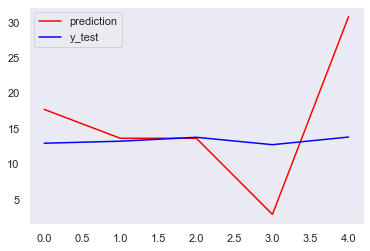

In [26]:
#fig = plt.figure(figsize=(18,10))
plt.plot(y_predicted,color='red', label='prediction')
plt.plot(y_actual,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough?

Some values of preducted prices converge with the actual prices but some deviate quite a lot. If model is allowed to run more number of iterations, this divergence can be decreased.